<a href="https://colab.research.google.com/github/Nadiaael/BigMart-Data-Analysis-and-Prediction/blob/main/BigMart-Sales-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**1.Problem statement:**
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**2.Importing the relevant librairies:**

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [65]:
df_train =pd.read_csv('/content/drive/MyDrive/Technocolabs Softwares internship /Train1.csv')
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [66]:
df_test =pd.read_csv('/content/drive/MyDrive/Technocolabs Softwares internship /Test1.csv')
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


##**3.Data Inspection:**

In [67]:
df_train .shape,df_test.shape

((8523, 12), (5681, 11))

We have 8523 rows and 12 columns in Train set whereas Test set has 5681 rows and 11 columns.

####**The percentage of the missing values in our dataset:**

In [68]:
df_train.isnull().sum()/df_train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [69]:
df_test.isnull().sum()/df_test.shape[0]*100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

We have 17% and 28% of missing values in Item weight and Outlet_Size columns respectively.

In [70]:
#categorical features
categorical = df_train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= df_train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 5


In [71]:
#categorical features
categorical =df_test.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

#numerical features
numerical= df_test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 4


###**Overall statistics analysis:**

In [72]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [73]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


##**4.Data cleaning/ Handling missing values :**

 Going through handling missing values is important in order to ensure that the model is not biased and not going to lead us to wrong predictions








As we already know **Item_Weight** and **Outlet_Size** got some missing values so in the coming parts we are giong to handle their misssing values

####**4.1 Item_Weight**



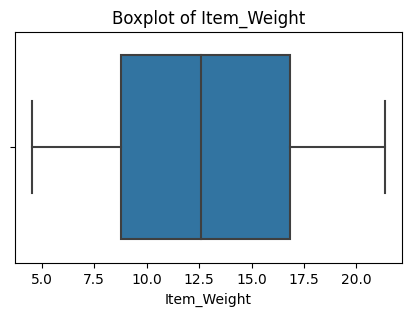

In [74]:
plt.figure(figsize=(5,3))
sns.boxplot(x='Item_Weight', data=df_train)

plt.title("Boxplot of Item_Weight")
plt.show()

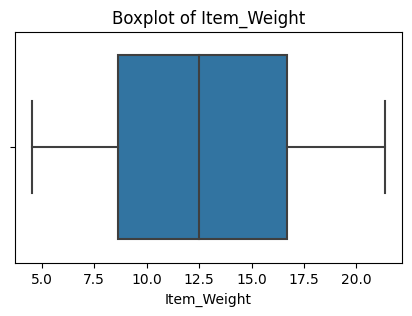

In [75]:
plt.figure(figsize=(5,3))
sns.boxplot(x='Item_Weight', data=df_test)

plt.title("Boxplot of Item_Weight")
plt.show()

**The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"**

In [76]:
df_train['Item_Weight']= df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())
df_test['Item_Weight']= df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean())

In [77]:
df_train['Item_Weight'].isnull().sum(),df_test['Item_Weight'].isnull().sum()

(0, 0)

In [78]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


We have succesfully imputed the missing values from the column Item_Weight

####**4.1 Outlet size:**

In [79]:
df_train['Outlet_Size'].isnull().sum(),df_test['Outlet_Size'].isnull().sum()

(2410, 1606)

In [80]:
print(df_train['Outlet_Size'].value_counts())
print('----------------------------------')
print(df_test['Outlet_Size'].value_counts())

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
----------------------------------
Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64


**Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column**

In [81]:
#Imputing with Mode
df_train['Outlet_Size']= df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])
df_test['Outlet_Size']= df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0])

df_train['Outlet_Size'].isnull().sum(),df_test['Outlet_Size'].isnull().sum()

(0, 0)

In [82]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


**We have succesfully imputed the missing values from the column Outlet_Size.**

##**5.Univariate analysis:**

###**The most available products:**

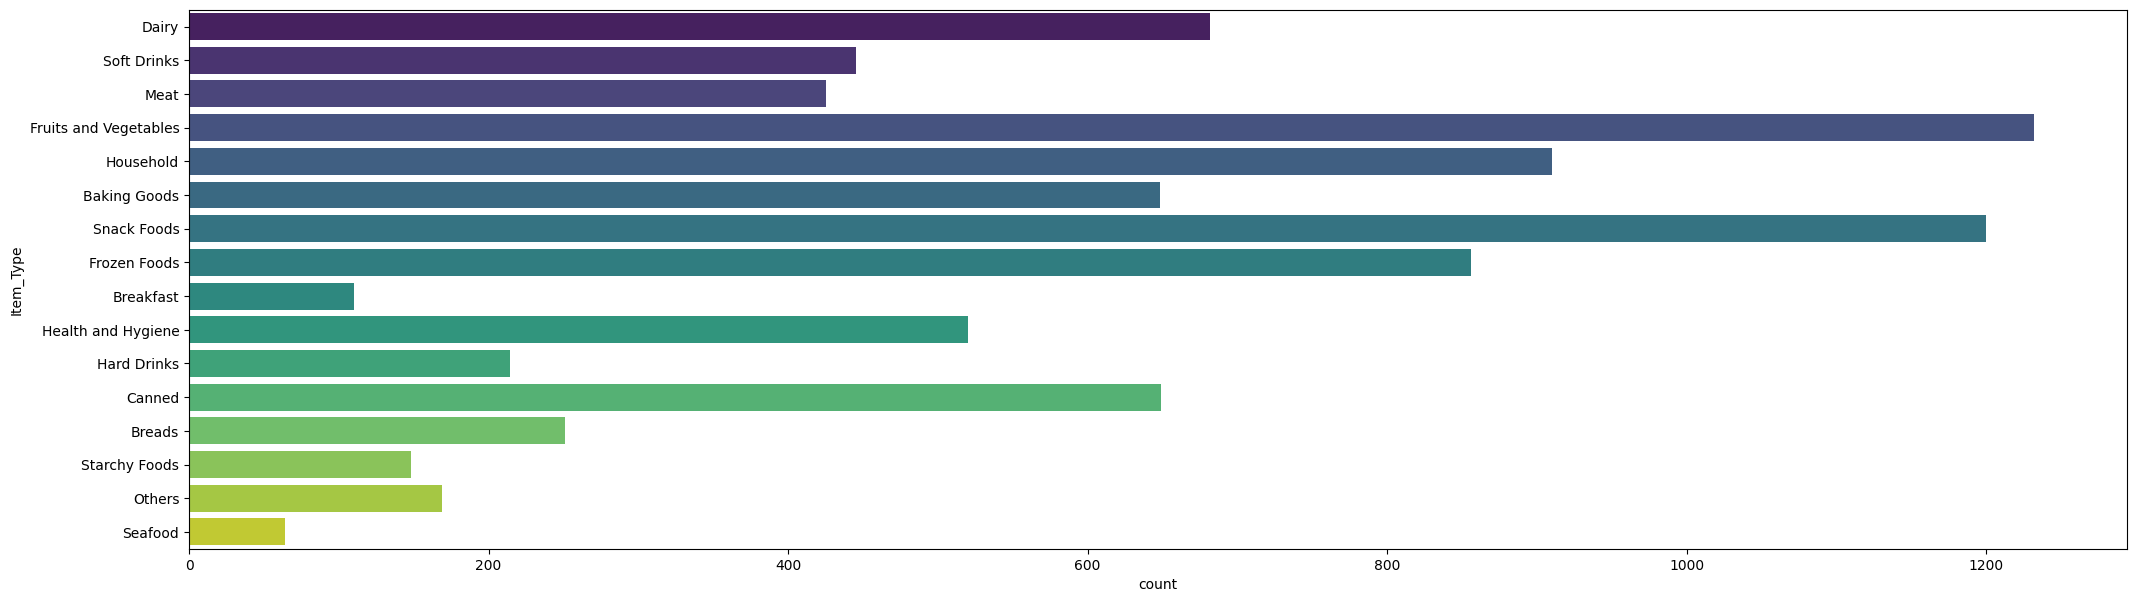

In [83]:
plt.figure(figsize=(25,7))
sns.countplot(y='Item_Type',data=df_train,palette='viridis')
plt.show()


**From this plot we conclude that:**


*   Fruits and vegetables are largely available because they are used on a daily basis.

*   Sea food is the least available.






###**The outlet_size the most preferred:**

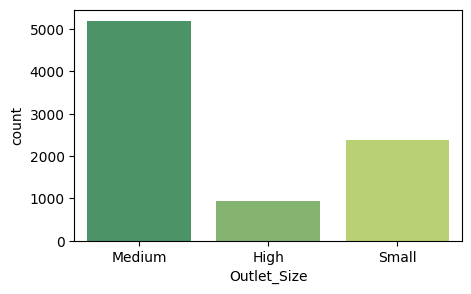

In [84]:
plt.figure(figsize=(5, 3))
sns.countplot(x='Outlet_Size', data=df_train, palette='summer')

plt.show()




*   **People tend to go for medium outlets**




###**Outlet location type the most preferred:**

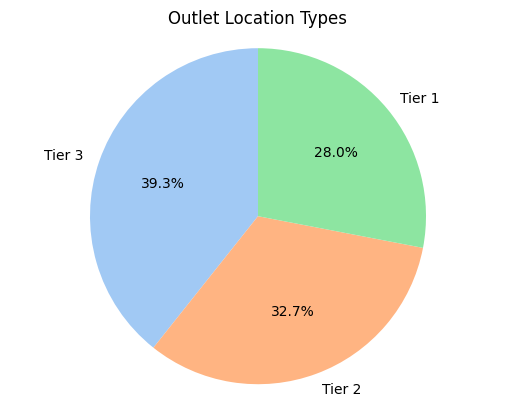

In [85]:
# Get the count of each category in "Outlet_Location_Type" column
value_counts = df_train['Outlet_Location_Type'].value_counts()

# Set a pastel color palette
colors = sns.color_palette('pastel')

# Plot the pie chart
plt.pie(value_counts, labels=value_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Location Types')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart

# Display the chart
plt.show()



**Oultes with location type tier 3 are the most preferred**

###**The bestselling product:**

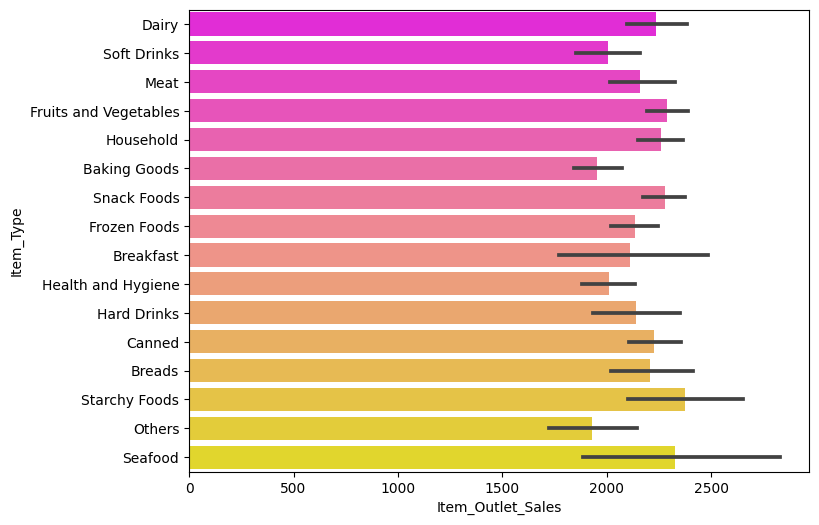

In [86]:
plt.figure(figsize=(8,6))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=df_train,palette='spring')

plt.show()

**The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.**

##**5.Bivariate analysis:**

####**Correlation test:**

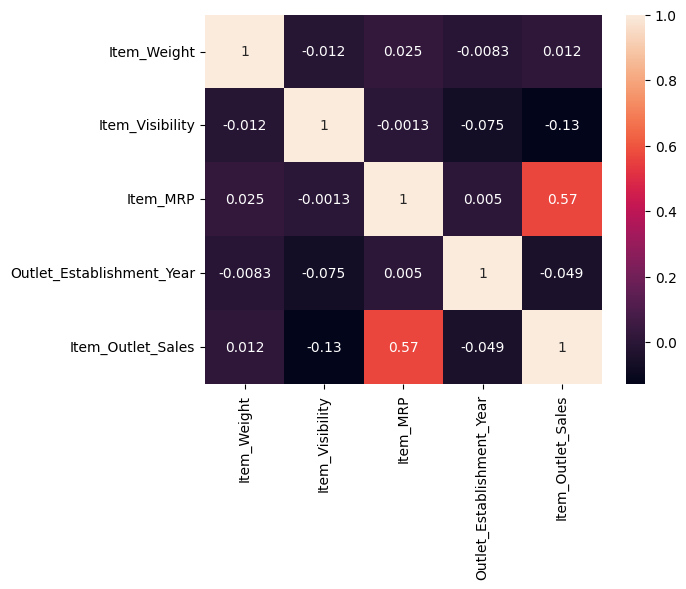

In [87]:
sns.heatmap(df_train.corr(), annot=True)
plt.show()

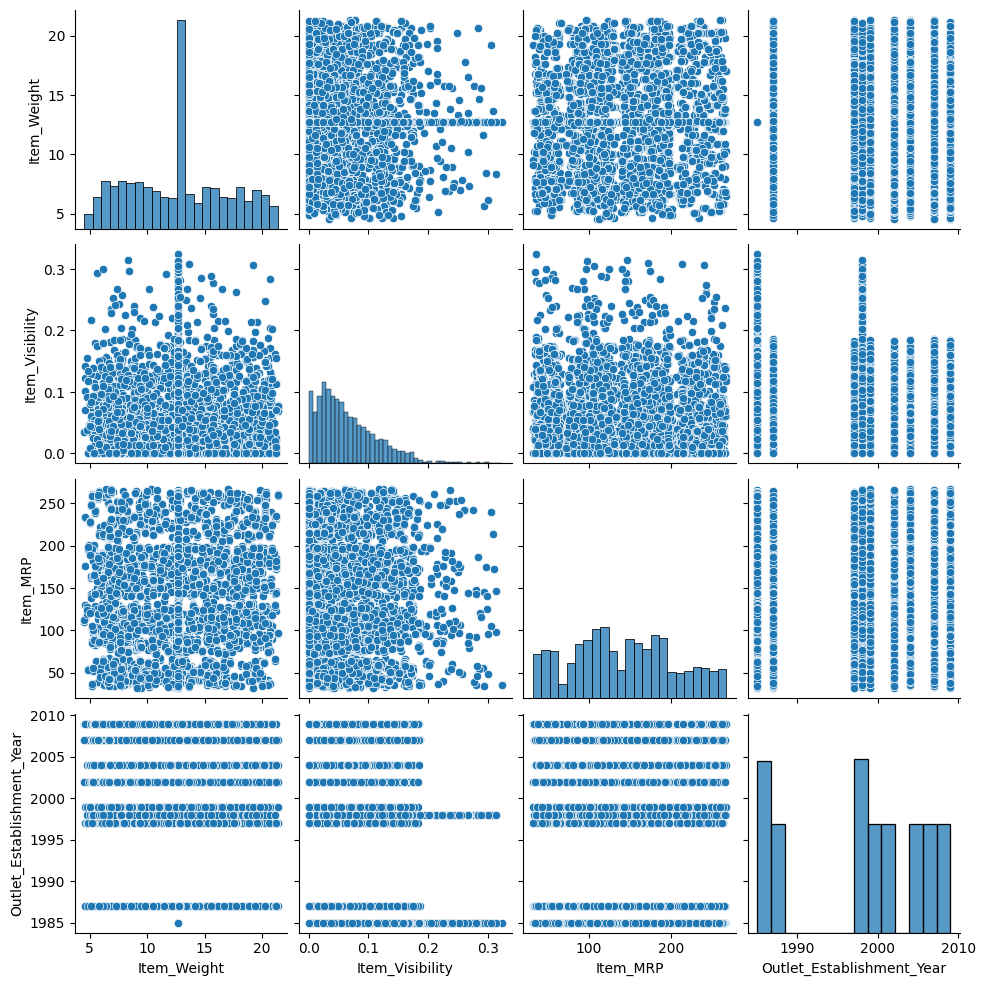

In [88]:
sns.pairplot(df_test)
plt.show()



* Through this heatmap plot and the pair plot we can notice that the majority of our dataset variables
have a weak correlation between each other except for the variables **Item_MRP** and **Item_Outlet_Sales** that have a relatively a stronger correlation but still not an enough reason for us to make a change in our dataset.



##**6.Feature Engineering:**

####**Operation years of a store:**

In [89]:
#Years:
df_train['Outlet_function_Years'] = 2023 - df_train['Outlet_Establishment_Year']
df_test['Outlet_function_Years'] = 2023 - df_test['Outlet_Establishment_Year']


In [90]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_function_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,24
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,25
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,36


####**Create a broad category of Type of Item:**

In [91]:
df_train['Item_Type_Combined'] = df_train['Item_Identifier'].apply(lambda x: x[0:2])
df_train['Item_Type_Combined'] = df_train['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

df_test['Item_Type_Combined'] = df_test['Item_Identifier'].apply(lambda x: x[0:2])
df_test['Item_Type_Combined'] = df_test['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})

In [92]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_function_Years,Item_Type_Combined
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,24,Food
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,16,Food
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,25,Non-Consumable
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,16,Food
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,38,Food


####**Modify categories of Item_Fat_Content:**

In [93]:
#Mark non-consumables as separate category in low_fat:
df_train.loc[df_train['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df_train['Item_Fat_Content'].value_counts()

Low Fat       3612
Regular       2889
Non-Edible    1599
LF             222
reg            117
low fat         84
Name: Item_Fat_Content, dtype: int64

In [94]:
#Mark non-consumables as separate category in low_fat:
df_test.loc[df_test['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
df_test['Item_Fat_Content'].value_counts()

Low Fat       2386
Regular       1935
Non-Edible    1087
LF             145
reg             78
low fat         50
Name: Item_Fat_Content, dtype: int64

####**Removing repeated values in the column Item_Fat_Content:**
Let's replace 'low fat' and 'LF' by 'Low Fat' and 'reg' by 'Regular'

In [95]:
# Replace values in df_train
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace('reg', 'Regular')

# Replace values in df_test
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace('reg', 'Regular')


In [96]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_function_Years,Item_Type_Combined
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,24,Food
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,16,Food
2,NCN55,14.600000,Non-Edible,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,25,Non-Consumable
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,16,Food
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,38,Food


##**7.Encoding Categorical Variables:**

###**Label Encoding:**

In [97]:
#Train dataframe:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
df_train['Outlet'] = le.fit_transform(df_train['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    df_train[i] = le.fit_transform(df_train[i])

#Test dataframe:

df_test['Outlet'] = le.fit_transform(df_test['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i])

In [98]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_function_Years,Item_Type_Combined,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,24,1,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,14,0,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,24,1,9
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,25,1,0
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,36,2,1


###**One Hot Encoding:**

In [99]:
#Train dataframe:

df_train = pd.get_dummies(df_train, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

#Test dataframe:

df_test = pd.get_dummies(df_test, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [100]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_function_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDW58,20.750000,0.007565,Snack Foods,107.8622,OUT049,1999,24,1,0,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,8.300000,0.038428,Dairy,87.3198,OUT017,2007,16,0,0,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,14.600000,0.099575,Others,241.7538,OUT010,1998,25,0,1,...,1,0,0,0,0,0,0,0,0,0
3,FDQ58,7.315000,0.015388,Snack Foods,155.0340,OUT017,2007,16,1,0,...,0,0,1,0,0,0,0,0,0,0
4,FDY38,12.695633,0.118599,Dairy,234.2300,OUT027,1985,38,0,0,...,0,0,0,0,0,1,0,0,0,0


In [101]:
df_test.iloc[:, -15:]

,Outlet_Type_2,Outlet_Type_3,Item_Type_Combined_0,Item_Type_Combined_1,Item_Type_Combined_2,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
5677,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5678,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
5679,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


##**8.Modeling:**

In [102]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales', 'Outlet_function_Years', 'Item_Fat_Content_0',
       'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Outlet_Location_Type_0',
       'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0',
       'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1',
       'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0',
       'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1',
       'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7',
       'Outlet_8', 'Outlet_9'],
      dtype='object')

####**Let's drop 'Item_Identifier' and 'Outlet_Identifier' columns:**

In [109]:
df_train = df_train.select_dtypes(exclude='object')
df_test2 = df_test.select_dtypes(exclude='object')
df_test2.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_function_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,20.750000,0.007565,107.8622,1999,24,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,8.300000,0.038428,87.3198,2007,16,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,14.600000,0.099575,241.7538,1998,25,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,7.315000,0.015388,155.0340,2007,16,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,12.695633,0.118599,234.2300,1985,38,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


####**Seperating the features from the target:**

In [104]:
X= df_train.drop(columns = ['Item_Outlet_Sales'], axis=1)
Y= df_train['Item_Outlet_Sales']
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_function_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_0,Outlet_Location_Type_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.016047,249.8092,1999,24,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,5.92,0.019278,48.2692,2009,14,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.016760,141.6180,1999,24,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.000000,182.0950,1998,25,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,36,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [105]:
Y.sample(3)

4127     299.610
3576    4554.072
803     3235.788
Name: Item_Outlet_Sales, dtype: float64

##**8.1.Linear Regression:**

####**Training the model on the training dataset:**

In [116]:
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X, Y)

LinearRegression()

####**Model testing:**

In [108]:
# Predict the outputs for the test dataset
predictions = lr.predict(df_test2)
print(predictions)

[1847.   1573.5  1873.75 ... 1809.   3561.5  1264.  ]


####**Merging the predicted sales with df_test dataframe:**

In [117]:
# Create a new dataframe 'df_predictions' with the predictions
df_predictions = pd.DataFrame(predictions, columns=['sales_predictions'])

# Merge the 'df_test' dataframe with the 'df_predictions' dataframe
df_merged = pd.concat([df_test, df_predictions], axis=1)
df_merged = df_merged[['Item_Identifier', 'Outlet_Identifier', 'sales_predictions']]
df_merged.head()

,Item_Identifier,Outlet_Identifier,sales_predictions
0,FDW58,OUT049,1847.00
1,FDW14,OUT017,1573.50
2,NCN55,OUT010,1873.75
3,FDQ58,OUT017,2592.75
4,FDY38,OUT027,5178.75


In [115]:
df_merged.to_csv('/content/sample_data/my_file.csv', index=False)
from google.colab import files
files.download('/content/sample_data/my_file.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>